# Predicting House Sale Prices

The housing market is a lucrative, but competitive industry to be in. Whether you are a homeowner looking to sell, a potential homebuyer, or in the real estate market as an agent; gaining insight about market trends and learning what features help increase the price of a home is very valuable.

In this project we will be working with housing data from the city of Ames, Iowa from the 2006 to 2010. We will build a machine learning pipeline that will help us make predictions to what a house will sell for based on specific features. We will hopefully build a succesful model that can take in new data and make accurate predictions.

Anyone in the real estate market can utilize the knowledge gained from the implementaion of the succesful model to make better and smarter desicions.

## Building the Pipeline
The first step in this project will be importing the necessary libraries and classes. We will then read in the data and become familizarized with it. Finally, we will write some functions to help expedite our pipeline. Ultimately we want to find the right features that will help train our algorithm succesfully by giving us low error metrics on our test sets.

In [1]:
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns

In [2]:
house = pd.read_csv('AmesHousing.tsv', delimiter = "\t")
house.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


We will begin by creating our functions. We will be keeping them very simple at first so we can update them to be more in depth as we progress through the project. We will run a simple linear regression model based on just the <code>'Gr Liv Area'</code> (above grade living area) and returning the Root Mean Squared Error.

Linear Regression is a simple but effective predictive model. It functions by describing a line that best fits the relationship between the input variables (features) and the output variable (our taget). The function finds the best weights, which are known as coefficients, for each input variable that will ultimately give us the closest predictions for the output variable. The goal is to find a model that gives us the lowest error metric.

The root mean squared error, works by taking the squaring the means of the difference between the prediction and the actual label, then taking the square root of that to bring it back into the original units.

In [3]:
def transform_features(df):
    return df

def select_features(df):
    return df[['Gr Liv Area','SalePrice']]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    numeric_train = train.select_dtypes(include = ['integer','float'])
    numeric_test = test.select_dtypes(include = ['integer','float'])
    
    features = numeric_train.columns.drop('SalePrice')
    lr = linear_model.LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'],predictions)
    rmse = np.sqrt(mse)
    
    return rmse

transformed_df = transform_features(house)
filtered_df = select_features(transformed_df)
rmse = train_and_test(filtered_df)
print('rmse: ',rmse)

rmse:  57088.25161263909


## Feature Engineering
Now that we created our starter pipeline, we'll need to modify the functions to become more robust. Our data has a lot of inconsistencies that will muddy our analysis and ultimately cause our model to become less accurate. We will need to account for missing values, handle categorical features, and transform text and numerical columns.

We can update our <code>trasform_features</code> function to drop or fill in missing values over a certain threshold. We also need to remove columns that will influence the information about the sale unfairly. For instance, the year the sale happened. The end goal of our function is to remove features that we do not want in our model, transform the features we do want into the proper format, and then create new features.

Finally, understanding all of the columns through reading the data documentation will be pivotable in determing which transformations are necessary and how to help our model be as accurate as possible.

#### Missing Value Threshold
Determining how to handle missing values is an important step. We mentioned earlier a threshold to help guide us in making that decision. For now, we'll handle the values as following:

- Drop any columns that have over 5% missing values
- Drop any text columns that have 1 or more missing values
- Fill in the most common value for numerical columns with less than 5% missing

#### Drop missing values over 5%
Let's begin with dropping columns that have over 5% missing values

In [4]:
missing = house.isnull().sum()
drop_missing = missing[(missing > len(house)/20)].sort_values()
drop_missing

Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Lot Frontage      490
Fireplace Qu     1422
Fence            2358
Alley            2732
Misc Feature     2824
Pool QC          2917
dtype: int64

In [5]:
house = house.drop(drop_missing.index,axis=1)

#### Drop text columns with 1 or more missing values
Now we can drop the text columns matching our criteria

In [6]:
text_counts = house.select_dtypes(include='object').isnull().sum().sort_values(ascending = False)
drop_missing_text = text_counts[(text_counts > 0)]
drop_missing_text

Bsmt Exposure     83
BsmtFin Type 2    81
BsmtFin Type 1    80
Bsmt Qual         80
Bsmt Cond         80
Mas Vnr Type      23
Electrical         1
dtype: int64

In [7]:
house = house.drop(drop_missing_text.index, axis=1)

#### Fill in numerical values with the Mode
Any columns that have missing numerical values less than 5%, we'll fill in with the most common value

In [8]:
num_missing = house.isnull().sum()
num_missing[num_missing > 0]

Mas Vnr Area      23
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64

Here we can see that all the columns left that contain null values are both integer columns and have way less than 5% null values. We can safely fill all null values with the mode.

In [9]:
house = house.fillna(house.mode().iloc[0])

In [10]:
house.isnull().sum().value_counts()

0    64
dtype: int64

Now that we have taken care of all missing values, our next step is to add some helpful features.

#### Creating useful features
Typically the more renovated a house is, the more likely it will sell higher. A couple good feature columns to create would be to add in how many years since the house was last remodeled and how many years since it was built was it sold.

In [11]:
years_sold_built = house['Yr Sold'] - house['Year Built']
years_since_remod = house['Yr Sold'] - house['Year Remod/Add']

#check for negative values
print(years_sold_built[years_sold_built < 0])
print(years_since_remod[years_since_remod < 0])

2180   -1
dtype: int64
1702   -1
2180   -2
2181   -1
dtype: int64


In [12]:
house['Built Years Before Sale'] = years_sold_built
house['Years Since Remodeled'] = years_since_remod

#drop negative values
house = house.drop([1702, 2180, 2181], axis=0)
#drop original columns
house = house.drop(['Year Built','Year Remod/Add'], axis = 1)

#### Drop useless columns
Lastly, we can drop columns that either aren't helpful for machine learning, or leak data about the final sale.

In [13]:
#useless columns 
house = house.drop(['PID','Order'], axis = 1)

#data leakage columns
house = house.drop(['Mo Sold', 'Sale Condition', 'Sale Type', 'Yr Sold'], axis=1)

## First Function Updates
Now that we saw what can be done for transforming some of the features, it's time to update our initial functions so all of this can be done in one step when running our pipeline.

In [14]:
def transform_features(df):
    missing = df.isnull().sum()
    drop_missing = missing[(missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing.index,axis=1)
    text_counts = df.select_dtypes(include='object').isnull().sum().sort_values(ascending = False)
    drop_missing_text = text_counts[(text_counts > 0)]
    df = df.drop(drop_missing_text.index, axis=1)
    df = df.fillna(df.mode().iloc[0])
    df['Built Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    df['Years Since Remodeled'] = df['Yr Sold'] - df['Year Remod/Add']
    df = df.drop([1702, 2180, 2181], axis=0)
    df = df.drop(['Year Built','Year Remod/Add','PID','Order',
                 'Mo Sold', 'Sale Condition', 'Sale Type', 'Yr Sold'], axis = 1)
    return df

def select_features(df):
    return df[['Gr Liv Area','SalePrice']]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    numeric_train = train.select_dtypes(include = ['integer','float'])
    numeric_test = test.select_dtypes(include = ['integer','float'])
    
    features = numeric_train.columns.drop('SalePrice')
    lr = linear_model.LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'],predictions)
    rmse = np.sqrt(mse)
    
    return rmse

house = pd.read_csv('AmesHousing.tsv', delimiter = "\t")
transformed_df = transform_features(house)
filtered_df = select_features(transformed_df)
rmse = train_and_test(filtered_df)
print('rmse: ',rmse)

rmse:  55275.36731241307


## Feature Selection
Our RMSE has dropped a bit, so we're on the right path. Now that we have cleaned and engineered some of the features, the next step is to utilize feature selection. We only want to use features that will help our model make accurate predictions rather than detract from the overall performace. Here we can look at overall correlations, inspect categorical data to determine how we should handle them (ie. converting to dummy variables of 1's and 0's), and look at numerical columns that should possbily be converted to categorical columns instead due to the numbers not having any semantic meaning. 

#### Correlation Matrix
First we'd like to gather some insight into which features correlate highly with our end goal of determing the sales price. If a feature does not correlate highly, say about 0.4, then this feature is likely unhelpful for our model and will just create uneccesary noise.

In [15]:
numerical_house = transformed_df.select_dtypes(include=['int','float'])

In [16]:
num_house_corr = numerical_house.corr()['SalePrice'].abs().sort_values(ascending = False)
num_house_corr_up = num_house_corr[num_house_corr >= .4]
num_house_corr_up

SalePrice                  1.000000
Overall Qual               0.801206
Gr Liv Area                0.717596
Garage Cars                0.648361
Total Bsmt SF              0.644012
Garage Area                0.641425
1st Flr SF                 0.635185
Built Years Before Sale    0.558979
Full Bath                  0.546118
Years Since Remodeled      0.534985
Mas Vnr Area               0.506983
TotRms AbvGrd              0.498574
Fireplaces                 0.474831
BsmtFin SF 1               0.439284
Name: SalePrice, dtype: float64

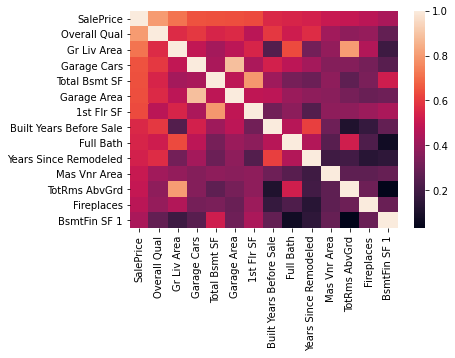

In [17]:
sns.heatmap(numerical_house[num_house_corr_up.index].corr().abs())

We can begin by dropping any columns that have a correlation less than .4.

In [18]:
transformed_df = transformed_df.drop(num_house_corr[num_house_corr < .4].index, axis=1)

Looking at the heatmap, we can see that there are a couple columns that correlate highly with eachother. Those would be <code>'TotRms AbvGrd'</code> with <code>'Gr Liv Area'</code> and <code>'Garage Area'</code> with <code>'Garage Cars'</code>.

Given the similarity between these columns, it will be safe to drop the columns that offer redundant information that may be less useful than the similar counterpart. We can safely drop <code>'TotRms AbvGrd'</code> and <code>'Garage Cars'</code>.

In [19]:
transformed_df = transformed_df.drop(['TotRms AbvGrd','Garage Cars'], axis =1)

#### Categorical Columns
Looking at the documentation for the dataset, we can see there are quite a few columns that are meant to be categorical. Any of the columns that can be represented as nominal variables can be converted to categorical for our model to use.

We need to keep in mind that some columns have hundreds of unique values and if we dummy code (1's and 0's) these columns, we'll be adding hundreds of columns to our dataframe. This will slow down our model. We should only keep the columns that have less than 10 unique values.

Lastly, when dealing with categorical columns, we should look at the overall variability of the values. If more than 95% of the values belong to a specific category, we can safely drop those as the model has nothing to really capture.

In [20]:
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [21]:
cats = []
transformed_df_copy = transformed_df.copy()

In [22]:
for col in nominal_features:
    if col in transformed_df_copy.columns:
        cats.append(col)
        if len(transformed_df_copy[col].value_counts()) > 10:
            cats.remove(col)
            transformed_df_copy = transformed_df_copy.drop([col],axis=1)

for col in cats:
    if transformed_df_copy[col].value_counts()[0] > .95*len(transformed_df_copy):
        cats.remove(col)
        transformed_df_copy = transformed_df_copy.drop(col,axis=1)

In [23]:
print('Total Columns: ',transformed_df_copy.shape[1],'\n\nNominal Features Kept:\n',cats)

Total Columns:  30 

Nominal Features Kept:
 ['MS Zoning', 'Land Contour', 'Lot Config', 'Condition 1', 'Bldg Type', 'House Style', 'Roof Style', 'Foundation', 'Central Air']


#### Dummy Coding
Now that we have removed any columns that will affect our model in a poor way, we can now convert all text/object columns into categorical columns. Once we have done this, we can utilize Pandas dummy coding that will allow us to separate each categorical column into 1's and 0's for yes and no. This will help find correlations between categorical columns and the <code>'Sale Price'</code>.

In [24]:
text_cols = transformed_df_copy.select_dtypes(include=['object'])
for col in text_cols:
    transformed_df_copy[col] = transformed_df_copy[col].astype('category')

In [25]:
transformed_df_copy = pd.concat([transformed_df_copy,
                               pd.get_dummies(
                                   transformed_df_copy.select_dtypes(include = ['category']))],
                               axis = 1).drop(text_cols,axis = 1)

## Second Update Function
Now that we have done some feature selection, we can add it to our <code>'select_features'</code> function to expedite our pipeline when running out model with options to change the coeffeciant and unique value thresholds.

In [26]:
def transform_features(df):
    missing = df.isnull().sum()
    drop_missing = missing[(missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing.index,axis=1)
    text_counts = df.select_dtypes(include='object').isnull().sum().sort_values(ascending = False)
    drop_missing_text = text_counts[(text_counts > 0)]
    df = df.drop(drop_missing_text.index, axis=1)
    df = df.fillna(df.mode().iloc[0])
    df['Built Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    df['Years Since Remodeled'] = df['Yr Sold'] - df['Year Remod/Add']
    df = df.drop([1702, 2180, 2181], axis=0)
    df = df.drop(['Year Built','Year Remod/Add','PID','Order',
                 'Mo Sold', 'Sale Condition', 'Sale Type', 'Yr Sold'], axis = 1)
    return df

def select_features(df, coef_thresh = 0.4, u_thresh = 10):
    num_df = df.select_dtypes(include=['int','float'])
    num_df_corr = num_df.corr()['SalePrice'].abs()
    df = df.drop(num_df_corr[num_df_corr < coef_thresh].index, axis=1)
    df = df.drop(['TotRms AbvGrd','Garage Cars'], axis =1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    cats = []
    for col in nominal_features:
        if col in df.columns:
            cats.append(col)
            if len(df[col].value_counts()) > 10:
                cats.remove(col)
                df = df.drop([col],axis=1)

    for col in cats:
        if df[col].value_counts()[0] > .95*len(df):
            cats.remove(col)
            df = df.drop(col,axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')   
    
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(
        include = ['category']))],axis = 1).drop(text_cols,axis = 1)
    
    return df

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    #numeric_train = train.select_dtypes(include = ['integer','float'])
    #numeric_test = test.select_dtypes(include = ['integer','float'])
    
    features = train.columns.drop('SalePrice')
    lr = linear_model.LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'],predictions)
    rmse = np.sqrt(mse)
    
    return rmse

house = pd.read_csv('AmesHousing.tsv', delimiter = "\t")
transformed_df = transform_features(house)
filtered_df = select_features(transformed_df)
rmse = train_and_test(filtered_df)
print('rmse: ',rmse)

rmse:  33020.8746123492


In [27]:
filtered_df_corr = filtered_df.corr()['SalePrice'].abs().sort_values(ascending=False)
filtered_df_corr[filtered_df_corr > .4]

SalePrice                  1.000000
Overall Qual               0.801206
Gr Liv Area                0.717596
Total Bsmt SF              0.644012
Garage Area                0.641425
1st Flr SF                 0.635185
Exter Qual_TA              0.591013
Built Years Before Sale    0.558979
Full Bath                  0.546118
Kitchen Qual_Ex            0.540099
Years Since Remodeled      0.534985
Kitchen Qual_TA            0.526714
Foundation_PConc           0.520974
Mas Vnr Area               0.506983
Exter Qual_Ex              0.484861
Fireplaces                 0.474831
Heating QC_Ex              0.454492
Exter Qual_Gd              0.446338
BsmtFin SF 1               0.439284
Name: SalePrice, dtype: float64

It looks like not only have we increased our correlated columns with <code>'SalePrice'</code>, but our RMSE is significantly less at 33,020.

## Cross Validation
Now that we have updated our pipeline to include feature engineering and feature selection, the last step will be to implement some cross validation to keep our model accurate and avoid overfitting. This way our model will be tested on different subsets of the training data before using our final model on the test set.

We will be implementing three different cross validation techiniques with an optional <code>'k'</code> parameter.

- When k = 0, we'll perform a simple holdout. The already implemented train/test split.
- When k = 1, we'll perform a simple cross validation where we shuffle and train on the first 1460 rows as fold one and test on the remaining as fold two. We'll then swap the two and train on fold two and test on fold one
- When k > 1, we'll perfom k-fold cross validation using the inputed k value for number of folds.

Let's make the final update to our functions by updating our <code>'train_and_test'</code> function to incorporate our cross validation techniques.

For our k > 1 function, we'll also add another metric to measure accuracy called the r^2 score. This is called coefficient of determination and measures from 0 to 1 how well the predicted prices fit the actual values. We'll also return a dataframe with the predicted vs actual labels so we can visualize them.

In [28]:
pd.options.mode.chained_assignment = None  # default='warn'

def transform_features(df):
    missing = df.isnull().sum()
    drop_missing = missing[(missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing.index,axis=1)
    text_counts = df.select_dtypes(include='object').isnull().sum().sort_values(ascending = False)
    drop_missing_text = text_counts[(text_counts > 0)]
    df = df.drop(drop_missing_text.index, axis=1)
    df = df.fillna(df.mode().iloc[0])
    df['Built Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    df['Years Since Remodeled'] = df['Yr Sold'] - df['Year Remod/Add']
    df = df.drop([1702, 2180, 2181], axis=0)
    df = df.drop(['Year Built','Year Remod/Add','PID','Order',
                 'Mo Sold', 'Sale Condition', 'Sale Type', 'Yr Sold'], axis = 1)
    return df

def select_features(df, coef_thresh = 0.4, u_thresh = 10):
    num_df = df.select_dtypes(include=['int','float'])
    num_df_corr = num_df.corr()['SalePrice'].abs()
    df = df.drop(num_df_corr[num_df_corr < coef_thresh].index, axis=1)
    df = df.drop(['TotRms AbvGrd','Garage Cars'], axis =1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    cats = []
    for col in nominal_features:
        if col in df.columns:
            cats.append(col)
            if len(df[col].value_counts()) > 10:
                cats.remove(col)
                df = df.drop([col],axis=1)

    for col in cats:
        if df[col].value_counts()[0] > .95*len(df):
            cats.remove(col)
            df = df.drop(col,axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')   
    
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(
        include = ['category']))],axis = 1).drop(text_cols,axis = 1)
    
    return df

def train_and_test(df, k = 0):  
    numeric_df = df.select_dtypes(include = ['integer','float'])
    features = numeric_df.columns.drop('SalePrice')
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        lr.fit(train[features],train['SalePrice'])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test['SalePrice'],predictions)
        rmse = np.sqrt(mse)
        
        return rmse
        
    elif k == 1:
        df = df.sample(frac = 1)
        train_1 = df[:1460]
        test_1 = df[1460:]
        train_2 = df[1460:]
        test_2 = df[:1460]
        
        lr.fit(train_1[features],train_1['SalePrice'])
        predictions_1 = lr.predict(test_1[features])
        mse_1 = mean_squared_error(test_1['SalePrice'],predictions_1)
        rmse_1 = np.sqrt(mse_1)
        
        lr.fit(train_2[features],train_2['SalePrice'])
        predictions_2 = lr.predict(test_2[features])
        mse_2 = mean_squared_error(test_2['SalePrice'],predictions_2)
        rmse_2 = np.sqrt(mse_2)
        avg_rmse = np.mean([rmse_1,rmse_2])
    
        return avg_rmse
    
    else:
        kf = KFold(n_splits = k, shuffle=True, random_state=1)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train['SalePrice'])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test['SalePrice'], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        test['predictions'] = predictions
        avg_rmse = np.mean(rmse_values)
        r2_score = cross_val_score(lr,df[features],df['SalePrice'],scoring='r2',cv=kf)
        return rmse_values, avg_rmse, np.mean(r2_score), test


house = pd.read_csv('AmesHousing.tsv', delimiter = "\t")
transformed_df = transform_features(house)
filtered_df = select_features(transformed_df)

rmse_holdout = train_and_test(filtered_df, k = 0)
rmse_k_1 = train_and_test(filtered_df, k = 1)
rmses_k_4, rmse_k_4, r2_score, test_df = train_and_test(filtered_df, k = 4)

print('RMSE for Holdout: ',rmse_holdout,'\nRMSE for K = 1: ',rmse_k_1,'\nRMSE for K = 4: ',rmse_k_4)
print('R^2 score for K = 4: ',r2_score)
print('Each Fold RMSE Score for K = 4',rmses_k_4)

RMSE for Holdout:  33020.8746123492 
RMSE for K = 1:  29584.426444168552 
RMSE for K = 4:  29114.867379240957
R^2 score for K = 4:  0.8652777194103873
Each Fold RMSE Score for K = 4 [36903.86955972374, 24678.86962358038, 26124.6698029472, 28752.06053071251]


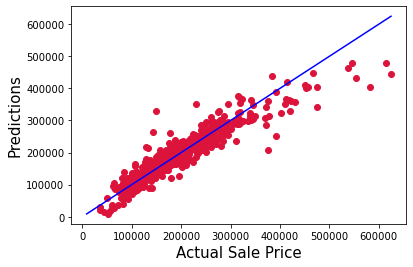

In [29]:
plt.scatter(test_df['SalePrice'],test_df['predictions'],c='crimson')
p1 = max(max(test_df['predictions']), max(test_df['SalePrice']))
p2 = min(min(test_df['predictions']), min(test_df['SalePrice']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Sale Price', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()

As we increase our K-Fold cross validation, our RMSE value steadily decreases. We can also see that we achieve a 0.865 r^2 which is a good indicator of accuracy for predicted vs actual labels. This is a good sign that our model is learning well and not overfitting. Once we graph a scatter plot of predicted vs actual sale price, it seems our predictions are relatively pretty for lower end housing sales, but as the price of the house increases, the predictions are further off. Since we were using RMSE as a measure of accuracy, those outlier estimations could be throwing off the overall scores.

Out of curiousity, we can run an iterative loop with different K-Folds to see if we can find a fold that offers better accuracy. We don't really want to go past 10 folds, otherwise the test set will be too small.

In [30]:
def train_and_test(df, k):  
    numeric_df = df.select_dtypes(include = ['integer','float'])
    features = numeric_df.columns.drop('SalePrice')
    lr = linear_model.LinearRegression()
    kf = KFold(n_splits = k, shuffle=True, random_state=1)
    mses = cross_val_score(lr, df[features], df['SalePrice'],scoring="neg_mean_squared_error", cv=kf)
    rmse = np.mean(np.sqrt(np.abs(mses)))
    r2_score = cross_val_score(lr,df[features],df['SalePrice'],scoring='r2',cv=kf)
    return rmse, np.mean(r2_score)
    
k_values = [i for i in range(2,11)]
rmses = []
r2 = []
for i in k_values:
    rmse,r_2 = train_and_test(filtered_df,i)
    rmses.append(rmse)
    r2.append(r_2)

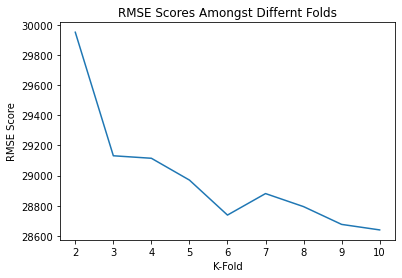

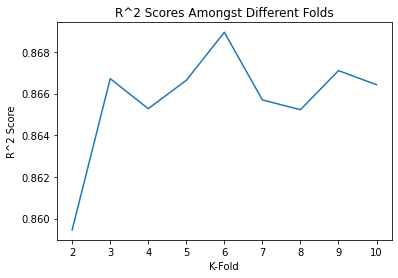

In [31]:
plt.plot(k_values,rmses)
plt.xlabel('K-Fold')
plt.ylabel('RMSE Score')
plt.title('RMSE Scores Amongst Differnt Folds')
plt.show()

plt.plot(k_values,r2)
plt.xlabel('K-Fold')
plt.ylabel('R^2 Score')
plt.title('R^2 Scores Amongst Different Folds')
plt.show()

In [32]:
print('RMSE for K = 6: ', rmses[4])
print('R^2 for K = 6: ', r2[4])

RMSE for K = 6:  28737.58838680964
R^2 for K = 6:  0.8689440051777594


In the graphs we can see that the R^2 spikes at 6 folds and the RMSE score is also low. Looking at the actual values, it seems that 6 folds seems to be a bit better than our previous best of 4 folds with an almost .87 r^2 and the RMSE of $28,737.59.

## Conclusion

In this project, we were able to create a pipeline to help our Linear Regression model produce more accurate predictions. With feature selection, feature engineering, and cross validation we were able to increase our accuracy with each update. Ultimately, in order to help our model become even more accurate, we need to implement more feature selection and engineering. In doing so, we'll be able to help our model learn more efficiently and reduce the chances of overfitting or becoming skewed to outliers.